In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')


In [3]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [4]:
imputer = SimpleImputer(strategy='median')
data[['Age', 'Fare']] = imputer.fit_transform(data[['Age', 'Fare']])

In [5]:
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [7]:
features = [f for f in features if f != 'Embarked']

In [8]:
X = data[features]
y = data['Survived']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [12]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

In [13]:
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.80


In [14]:
print("\nClassification Report:")



Classification Report:


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



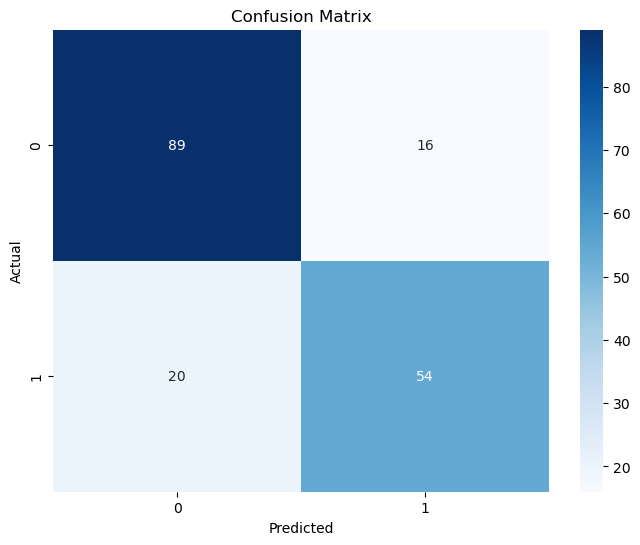

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [17]:
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)


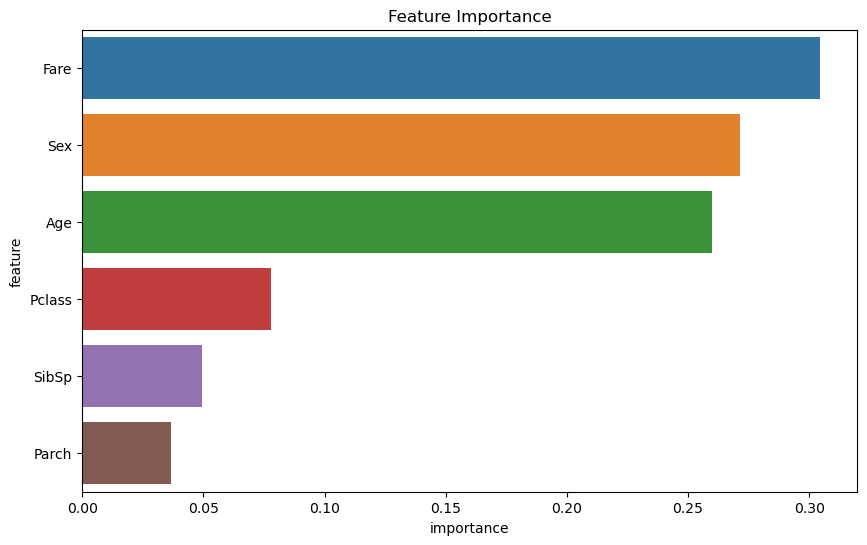

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()


In [19]:
print("\nSample Predictions:")
sample_passengers = X_test.sample(5)
sample_predictions = model.predict(scaler.transform(sample_passengers))
for i, (index, passenger) in enumerate(sample_passengers.iterrows()):
    print(f"Passenger {i+1}:")
    for feature, value in passenger.items():
        print(f"  {feature}: {value}")
    print(f"  Predicted: {'Survived' if sample_predictions[i] == 1 else 'Did not survive'}")
    print(f"  Actual: {'Survived' if y_test[index] == 1 else 'Did not survive'}")
    print()


Sample Predictions:
Passenger 1:
  Pclass: 3.0
  Sex: 0.0
  Age: 19.0
  SibSp: 0.0
  Parch: 0.0
  Fare: 7.8792
  Predicted: Did not survive
  Actual: Survived

Passenger 2:
  Pclass: 3.0
  Sex: 1.0
  Age: 25.0
  SibSp: 0.0
  Parch: 0.0
  Fare: 7.25
  Predicted: Did not survive
  Actual: Did not survive

Passenger 3:
  Pclass: 2.0
  Sex: 0.0
  Age: 40.0
  SibSp: 1.0
  Parch: 1.0
  Fare: 39.0
  Predicted: Survived
  Actual: Survived

Passenger 4:
  Pclass: 1.0
  Sex: 1.0
  Age: 71.0
  SibSp: 0.0
  Parch: 0.0
  Fare: 49.5042
  Predicted: Did not survive
  Actual: Did not survive

Passenger 5:
  Pclass: 1.0
  Sex: 1.0
  Age: 71.0
  SibSp: 0.0
  Parch: 0.0
  Fare: 34.6542
  Predicted: Did not survive
  Actual: Did not survive

